In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 第四章补充题3
### 1

In [2]:
agsrs = pd.read_csv('agsrs.csv')
y = agsrs["acres92"]
x = agsrs["acres87"]
b_hat = y.mean() / x.mean()

In [3]:
n = 300
N = 3078
s_e2 = y.var() - 2 * b_hat * np.cov(y, x, ddof=1)[0,1] + b_hat**2 * x.var()
v_b_hat = (1/n - 1/N) * s_e2 / (x.mean() ** 2)

In [4]:
print(b_hat)
se_b_hat = np.sqrt(v_b_hat)
print(se_b_hat)
ci_b_hat = (b_hat - 1.96 * se_b_hat, b_hat + 1.96 * se_b_hat)
print(ci_b_hat)

0.9865652371433473
0.005750472694966445
(0.9752943106612131, 0.9978361636254816)


### 2

* Take 500 samples with replacement of size 100

In [5]:
bootstrap_time = 1000
bootstrap_size = 100
bootstrap_b_hat = np.zeros(bootstrap_time)
for i in range(bootstrap_time):
    bootstrap_sample = agsrs.sample(n=bootstrap_size, replace=True)
    y = bootstrap_sample["acres92"]
    x = bootstrap_sample["acres87"]
    bootstrap_b_hat[i] = y.mean() / x.mean()

In [6]:
bootstrap_ci95 = (np.percentile(bootstrap_b_hat, 2.5), np.percentile(bootstrap_b_hat, 97.5))
print(bootstrap_ci95)

(0.9650709024696571, 1.008621814102108)


## 4.8.3
### a

In [7]:
x = np.array([12, 11.4, 7.9, 9, 10.5, 7.9, 7.3, 10.2, 11.7, 11.3, 5.7, 8, 10.3, 12, 9.2, 8.5, 7, 10.7, 9.3, 8.2])
y = np.array([125, 119, 83, 85, 99, 117, 69, 133, 154, 168, 61, 80, 114, 147, 122, 106, 82, 88, 97, 99])
df = pd.DataFrame({"x": x, "y": y})

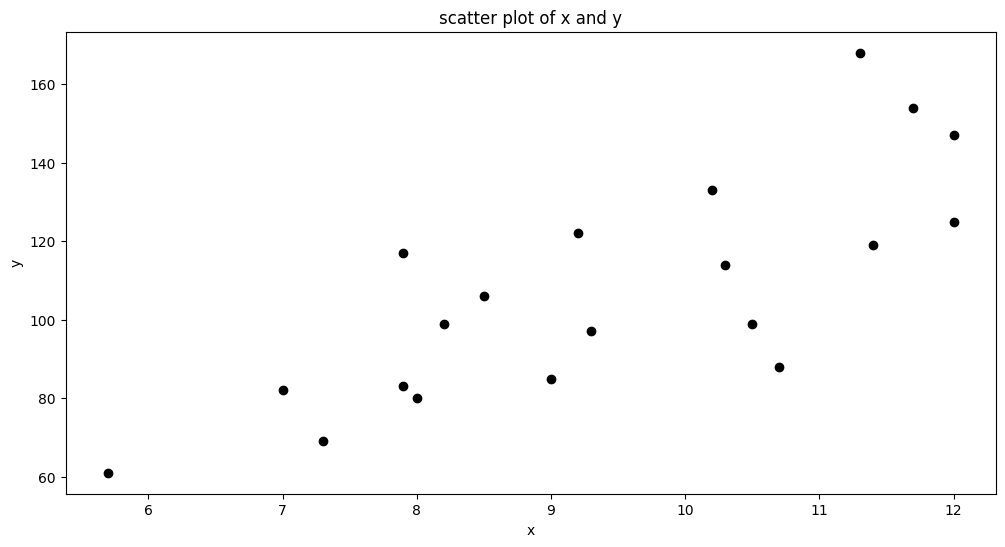

In [8]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(x, y, color="black")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("scatter plot of x and y")
plt.savefig("4.8.3a.svg")

### b

In [9]:
x_u = 10.3
b_hat = y.mean() / x.mean()
s_e2 = y.var() - 2 * b_hat * np.cov(y, x, ddof=1)[0,1] + b_hat**2 * x.var()

In [10]:
n = 20
N = 1132
y_b_hat = b_hat * x_u
print(y_b_hat)
v_y_b_hat = (1/n - 1/N) * s_e2 * (x_u / x.mean()) ** 2
se_y_b_hat = np.sqrt(v_y_b_hat)
print(se_y_b_hat)
ci_y_b_hat = (y_b_hat - 1.96 * se_y_b_hat, y_b_hat + 1.96 * se_y_b_hat)
print(ci_y_b_hat)

117.62041467304627
3.906462190381681
(109.96374877989817, 125.27708056619437)


### c

In [11]:
y_bar = y.mean()
print(y_bar)
v_y_bar = (1/n - 1/N) * y.var()
se_y_bar = np.sqrt(v_y_bar)
print(se_y_bar)
ci_y_bar = (y_bar - 1.96 * se_y_bar, y_bar + 1.96 * se_y_bar)
print(ci_y_bar)

107.4
6.191329854807021
(95.26499348457824, 119.53500651542177)


### d

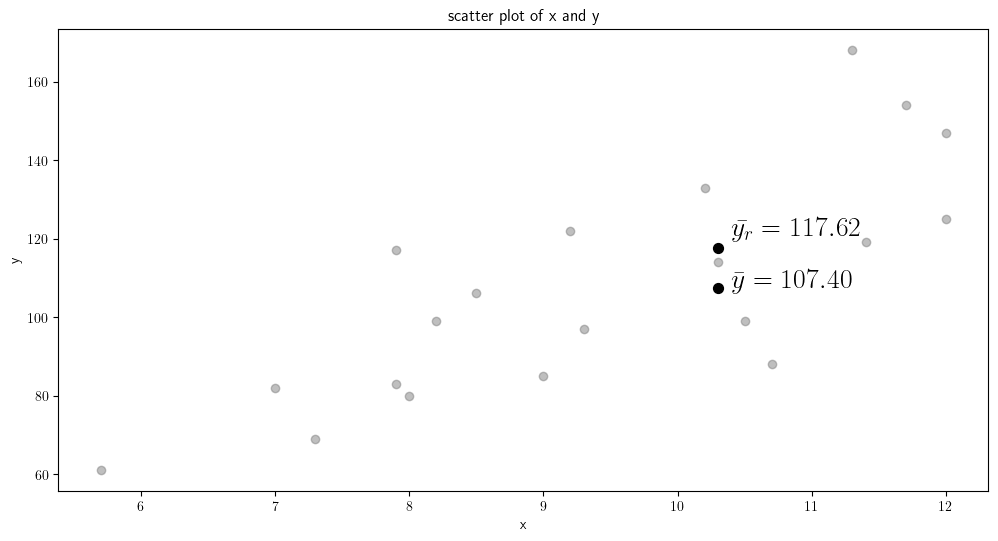

In [12]:
plt.rcParams["text.usetex"] = True
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(x, y, color="grey", alpha=0.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("scatter plot of x and y")
ax.scatter(x_u, y_b_hat, s=50, color="black")
ax.scatter(x_u, y_bar, s=50, color="black")
ax.text(x_u + 0.1, y_b_hat + 3, r"$\bar{y_r}=" + f"{y_b_hat:.2f}" + r"$", color="black", fontsize=20)
ax.text(x_u + 0.1, y_bar, r"$\bar{y}=" + f"{y_bar:.2f}" + r"$", color="black", fontsize=20)
plt.savefig("4.8.3d.svg")

In [13]:
np.corrcoef(x, y)[0,1]

0.7816196606739746

## 4.8.4
### a

In [14]:
children = np.array([0, 1, 2, 3, 4, 5])
y = np.array([528, 189, 225, 76, 8, 2])
df = pd.DataFrame({"children": children, "y": y})
n = 1028

In [15]:
p_hat = (n - y[0]) / n
print(p_hat)
v_p_hat = p_hat * (1 - p_hat) / n
se_p_hat = np.sqrt(v_p_hat)
print(se_p_hat)
ci_p_hat = (p_hat - 1.96 * se_p_hat, p_hat + 1.96 * se_p_hat)
print(ci_p_hat)

0.48638132295719844
0.015588785866183287
(0.4558273026594792, 0.5169353432549176)


### b

In [16]:
y_d = np.sum(children * y) / n
se_y_d = np.sqrt(1/n**2 * (np.sum(children**2 * y) - (n * y_d**2)))
print(y_d)
print(se_y_d)
ci_y_d = (y_d - 1.96 * se_y_d, y_d + 1.96 * se_y_d)
print(ci_y_d)

0.8842412451361867
0.032948157346772214
(0.8196628567365132, 0.9488196335358603)


### c

In [17]:
t_u = 400000 * n / 1500 * y_d
se_t_u = 400000 * np.sqrt(1/1500 * (np.sum(children**2 * y) - (n * y_d**2)) / 1499)
print(t_u)
print(se_t_u)
ci_t_u = (t_u - 1.96 * se_t_u, t_u + 1.96 * se_t_u)
print(ci_t_u)

242399.99999999997
9035.200436263547
(224691.0071449234, 260108.99285507653)


## 4.8.9
### a

In [18]:
crimes = pd.read_csv("crimes.csv")

In [19]:
n = 5000
N = 7_048_107
p_b = np.sum(crimes["crimetype"] == "burglary") / n
se_p_b = np.sqrt(p_b * (1 - p_b) / n)
print(p_b)
print(se_p_b)
ci_p_b = (p_b - 1.96 * se_p_b, p_b + 1.96 * se_p_b)
print(ci_p_b)

0.059
0.0033322364862056236
(0.052468816487036975, 0.06553118351296303)


### b

In [20]:
p_agg_d = np.sum((crimes["crimetype"] == "aggasslt") & (crimes["domestic"] == 1)) / n
se_p_agg_d = np.sqrt(p_agg_d * (1 - p_agg_d) / n)

In [21]:
t_agg_d = p_agg_d * N
se_t_agg_d = np.sqrt(p_agg_d * (1 - p_agg_d) / n) * N
print(t_agg_d)
print(se_t_agg_d)
ci_t_agg_d = (t_agg_d - 1.96 * se_t_agg_d, t_agg_d + 1.96 * se_t_agg_d)
print(ci_t_agg_d)

76119.5556
10302.4714114285
(55926.71163360015, 96312.39956639986)


## 4.8.11
### a

In [22]:
cherry = pd.read_csv("cherry.csv")

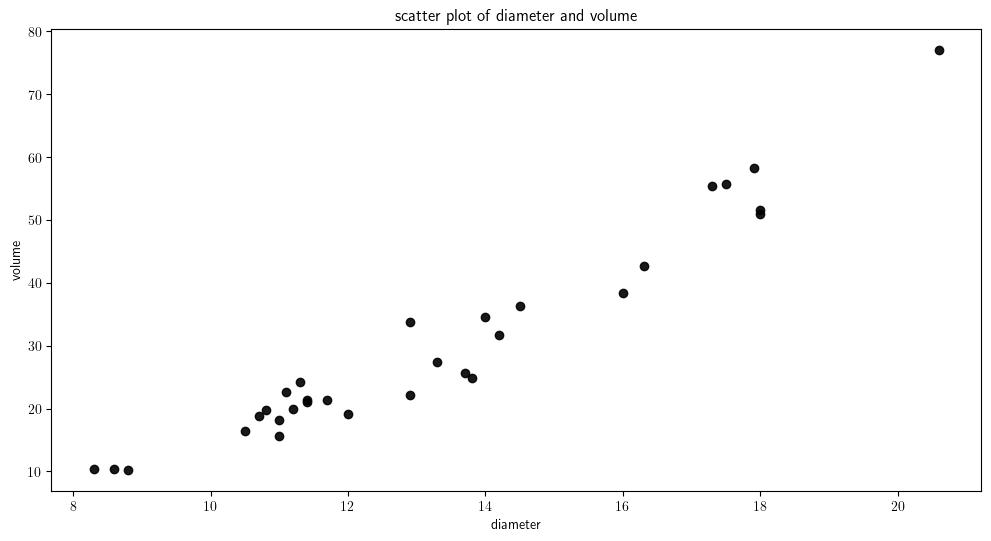

In [23]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(cherry["diameter"], cherry["volume"], color="black", alpha=0.9)
ax.set_xlabel("diameter")
ax.set_ylabel("volume")
ax.set_title("scatter plot of diameter and volume")
plt.savefig("4.8.11a.svg")

### b

In [24]:
y = cherry["volume"]
x = cherry["diameter"]
n = 31
N = 2967
b_hat = y.mean() / x.mean()
s_e2 = y.var() - 2 * b_hat * np.cov(y, x, ddof=1)[0,1] + b_hat**2 * x.var()
t_r = b_hat * 41835
v_t_r = (1/n - 1/N) * s_e2 * (41835 / x.mean())**2
se_v_t_r = np.sqrt(v_t_r)
ci_t_r = (t_r - 1.96 * se_v_t_r, t_r + 1.96 * se_v_t_r)
print(t_r)
print(ci_t_r)

95272.15850986118
(84548.14717184479, 105996.16984787758)


### d

In [25]:
y_bar = y.mean()
se_y_bar = np.sqrt((1/n - 1/N) * y.var())
t_hat = y_bar * N
se_t_hat = se_y_bar * N
ci_t_hat = (t_hat - 1.96 * se_t_hat, t_hat + 1.96 * se_t_hat)
print(t_hat)
print(ci_t_hat)

89517.26129032257
(72438.47743193789, 106596.04514870724)


In [26]:
np.corrcoef(x, y)[0,1]

0.9671193682556305

## 4.8.13
### a

In [27]:
counties = pd.read_csv("counties.csv")

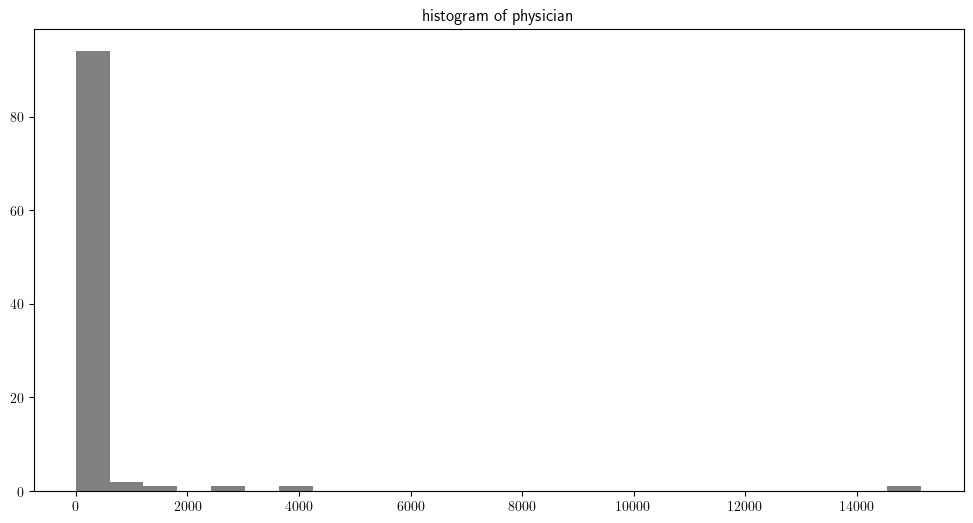

In [28]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(counties["physician"], bins=25, color="grey")
ax.set_title("histogram of physician")
plt.savefig("4.8.13a.svg")

### b

In [29]:
y = counties["physician"]
y_bar = y.mean()
n = 100
N = 3141
se_y_bar = np.sqrt((1/n - 1/N) * y.var())
t_hat = y_bar * N
se_t_hat = se_y_bar * N
print(t_hat)
print(se_t_hat)

933410.9700000001
491982.7871364016


### c

In [30]:
x = counties["totpop"]
t_x = 255_077_536
x_u = t_x / N
b_hat = y.mean() / x.mean()
s_e2 = y.var() - 2 * b_hat * np.cov(y, x, ddof=1)[0,1] + b_hat**2 * x.var()
t_r = b_hat * t_x
v_t_r = (1/n - 1/N) * s_e2 * (t_x / x.mean())**2
se_v_t_r = np.sqrt(v_t_r)
ci_t_r = (t_r - 1.96 * se_v_t_r, t_r + 1.96 * se_v_t_r)
print(t_r)
print(se_v_t_r)

639506.0283989459
87885.26514909908


In [31]:
np.corrcoef(x, y)[0,1]

0.9771174932511311